In [1]:
import sys

In [2]:
import site; print(site.getsitepackages())

['c:\\Users\\jpkli\\miniforge3\\envs\\spectra', 'c:\\Users\\jpkli\\miniforge3\\envs\\spectra\\lib\\site-packages']


In [3]:
print(site.getsitepackages()[-1])

c:\Users\jpkli\miniforge3\envs\spectra\lib\site-packages


In [4]:
from stellarnet_driverLibs import stellarnet_driver3 as sn

In [5]:
version = sn.version()
print(version)

StellarNet Inc USB Driver - Version 2.6 Compiled on 09/09/2024


In [6]:
inttime = 50
scansavg = 1
smooth = 0
xtiming = 3
# init Spectrometer - Get BOTH spectrometer and wavelength
spectrometer, wav = sn.array_get_spec(0)  # 0 for first channel and 1 for second channel , up to 127 spectrometers

In [7]:
spectrometer

{'device': <stellarnet_driverLibs.stellarnet_driver3.StellarNet at 0x29636f70850>,
 'config_id': 0}

In [8]:
wav

array([[ 183.47     ],
       [ 184.0137826],
       [ 184.5574604],
       ...,
       [1076.474465 ],
       [1076.8039316],
       [1077.1332934]])

In [9]:
print(spectrometer)
# sn.ext_trig(spectrometer, True)

{'device': <stellarnet_driverLibs.stellarnet_driver3.StellarNet object at 0x0000029636F70850>, 'config_id': 0}


In [10]:
deviceID = sn.getDeviceId(spectrometer)
print("\nMy device ID: ", deviceID)


My device ID:  16021832


In [11]:
currentParam = sn.getDeviceParam(spectrometer)


In [12]:
currentParam

{'coeffs': [1.08767, -0.0002096, 183.47, 0.0],
 'full_name': 'BLACK C-SR-50 #16021832         ',
 'x_trigger': False,
 'int_time': 100,
 'x_timing': 3,
 'x_smooth': 0,
 'scans_to_avg': 1,
 'temp_comp': False,
 'emptyDevice': False,
 'det_type': 1,
 'model': 'BLACK C-SR-50',
 'device_id': '16021832',
 '_pixelCount': 2048,
 '_is_T3': False}

In [13]:
sn.ext_trig(spectrometer, False)


In [14]:
sn.setParam(spectrometer, inttime, scansavg, smooth, xtiming, True)


In [15]:
currentParam = sn.getDeviceParam(spectrometer)


In [16]:
currentParam

{'coeffs': [1.08767, -0.0002096, 183.47, 0.0],
 'full_name': 'BLACK C-SR-50 #16021832         ',
 'x_trigger': False,
 'int_time': 50,
 'x_timing': 3,
 'x_smooth': 0,
 'scans_to_avg': 1,
 'temp_comp': False,
 'emptyDevice': False,
 'det_type': 1,
 'model': 'BLACK C-SR-50',
 'device_id': '16021832',
 '_pixelCount': 2048,
 '_is_T3': False}

In [17]:
first_data = sn.array_spectrum(spectrometer, wav)  # get specturm for the first time


In [18]:
first_data = sn.getSpectrum_Y(spectrometer)


In [19]:
first_data

array([1805, 1790, 1771, ..., 1743, 1765, 1786])

In [20]:
import pandas as pd

<Axes: xlabel='0', ylabel='1'>

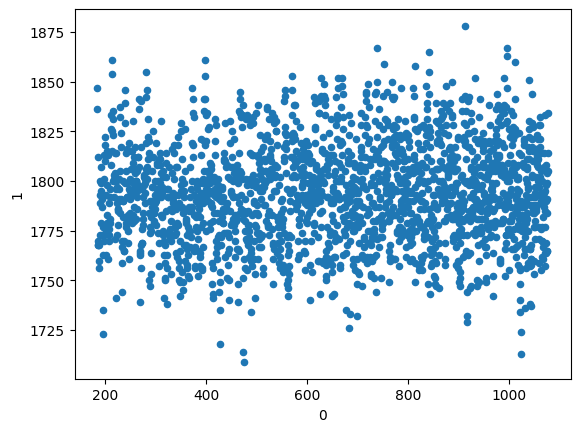

In [23]:
pd.DataFrame(sn.array_spectrum(spectrometer, wav)).plot(kind="scatter", x=0, y=1)

In [24]:
sn.reset(spectrometer)


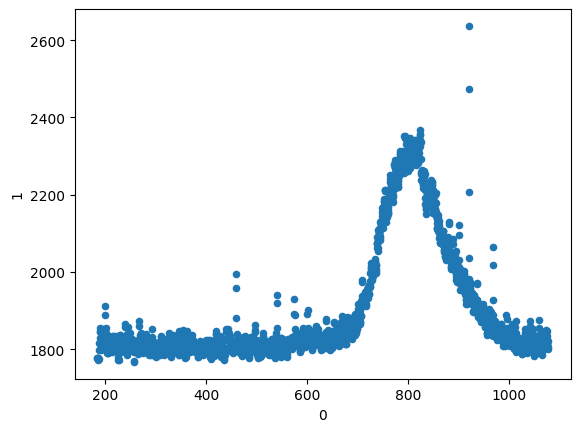

In [27]:
import pandas as pd
from stellarnet_driverLibs import stellarnet_driver3 as sn

inttime = 1000
scansavg = 10
smooth = 0
xtiming = 3

spectrometer, wav = sn.array_get_spec(0)
sn.ext_trig(spectrometer, False)
sn.setParam(spectrometer, inttime, scansavg, smooth, xtiming, True)

df = pd.DataFrame(sn.array_spectrum(spectrometer, wav))
df.plot(kind="scatter", x=0, y=1)

sn.reset(spectrometer)

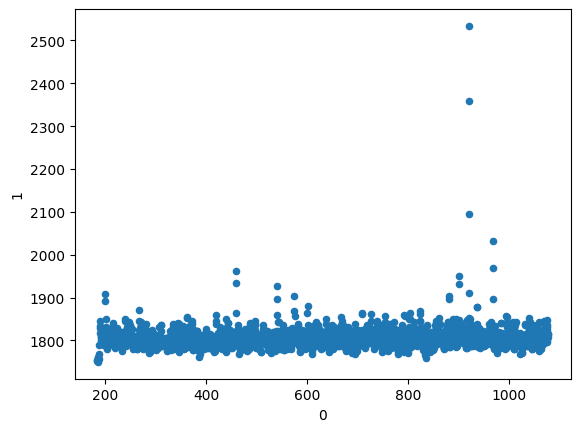

In [28]:
import pandas as pd
from stellarnet_driverLibs import stellarnet_driver3 as sn

inttime = 1000
scansavg = 10
smooth = 0
xtiming = 3

spectrometer, wav = sn.array_get_spec(0)
sn.ext_trig(spectrometer, False)
sn.setParam(spectrometer, inttime, scansavg, smooth, xtiming, True)

df = pd.DataFrame(sn.array_spectrum(spectrometer, wav))
df.plot(kind="scatter", x=0, y=1)

sn.reset(spectrometer)